## Learning Algorithms - Unsupervised Learning

>  Reminder:  In machine learning, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the training set given to the learner is unlabeled, there is no error or reward signal to evaluate a potential solution. Basically, we are just finding a way to represent the data and get as much information from it that we can.

HEY!  Remember PCA from above?  PCA is actually considered unsupervised learning.  We just put it up there because it's a good way to visualize data at the beginning of the ML process.

Let's revisit it in a little more detail using the `iris` dataset.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

### PCA revisited

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()

# subset data to have only sepal width and petal length (cm) for simplification
X = iris.data[:, 1:3]

pca = PCA(n_components = 2)
pca.fit(X)

print("% of variance attributed to components: "+ \
      ', '.join(['%.2f' % (x * 100) for x in pca.explained_variance_ratio_]))
print('\ncomponents and amount of variance explained by each feature:', pca.components_)
print(pca.mean_)

The `pca.explained_variance_` is like the magnitude of a components influence (amount of variance explained) and the `pca.components_` is like the direction vector for each feature in each component (directions of max variance in a feature in a component vector).

In [ ]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
means = pca.mean_

for length, vector in zip(pca.explained_variance_, pca.components_):
    print(vector)
    print(3*np.sqrt(length))
    v = vector * 3 * np.sqrt(length)
    print(v)
    plt.plot([means[0], v[0]+means[0]], [means[1], v[1]+means[1]], '-k', lw=3)

# axis dims
plt.xlim(0, max(X[:, 0])+3)
plt.ylim(0, max(X[:, 1])+3)

# labels
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

Recall, in the ML 101 module: unsupervised models have a `fit()`, `transform()` and/or `fit_transform()` in `sklearn`.


If you want to both get a fit and new dataset with reduced dimensionality, which would you use below? (Fill in blank in code)

In [ ]:
# get back to our 4D dataset
X, y = iris.data, iris.target

pca = PCA(n_components = 0.95) # keep 95% of variance
X_trans = pca.___(X) # <- fill in the blank
print(X.shape)
print(X_trans.shape)

In [ ]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=iris.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spring', 10))
plt.ylabel('Component 2')
plt.xlabel('Component 1')

### Clustering
KMeans finds cluster centers that are the mean of the points within them.  Likewise, a point is in a cluster because the cluster center is the closest cluster center for that point.

KMeans employ the <i>Expectation-Maximization</i> algorithm which works as follows: 

1. Guess cluster centers
* Assign points to nearest cluster
* Set cluster centers to the mean of points
* Repeat 1-3 until converged

In [130]:
%pwd

'/Users/micheleenharris/Documents/bin/python_stuff/intro-to-sklearn_working'

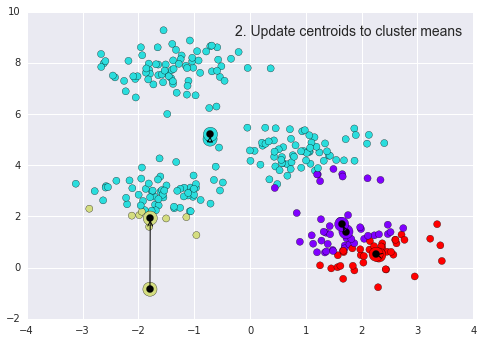

In [150]:
import fig_code
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive()

In [137]:
from IPython.html.widgets import interact
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components = 0.95) # keep 95% of variance
X = pca.fit_transform(X)

In [161]:
n_clusters  = 3
random_state = 2

In [164]:
def _kmeans_step(frame=0, n_clusters=n_clusters):
    rng = np.random.RandomState(2)
    labels = np.zeros(X.shape[0])
    centers = rng.randn(n_clusters, 2)

    nsteps = frame // 3

    for i in range(nsteps + 1):
        old_centers = centers
        if i < nsteps or frame % 3 > 0:
            dist = euclidean_distances(X, centers)
            labels = dist.argmin(1)

        if i < nsteps or frame % 3 > 1:
            centers = np.array([X[labels == j].mean(0)
                                for j in range(n_clusters)])
            nans = np.isnan(centers)
            centers[nans] = old_centers[nans]


    # plot the data and cluster centers
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                vmin=0, vmax=n_clusters - 1);
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                c=np.arange(n_clusters),
                s=200, cmap='rainbow')
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                c='black', s=50)

    # plot new centers if third frame
    if frame % 3 == 2:
        for i in range(n_clusters):
            plt.annotate('', centers[i], old_centers[i], 
                         arrowprops=dict(arrowstyle='->', linewidth=1))
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(n_clusters),
                    s=200, cmap='rainbow')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)

    plt.xlim(-4, 5)
    plt.ylim(-2, 1.5)
    plt.ylabel('PC 2')
    plt.xlabel('PC 1')

    if frame % 3 == 1:
        plt.text(1.2, 4.5, "1. Reassign points to nearest centroid",
                 ha='right', va='top', size=14)
    elif frame % 3 == 2:
        plt.text(1.2, 4.5, "2. Update centroids to cluster means",
                 ha='right', va='top', size=14)

<function __main__._kmeans_step>

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


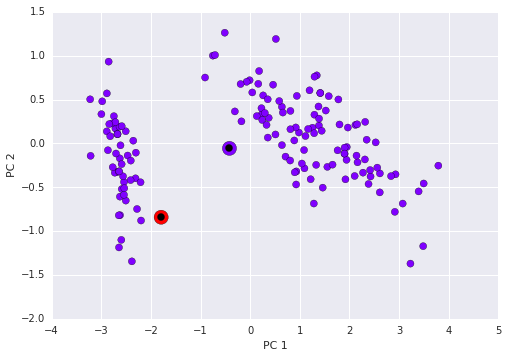

In [165]:
min_clusters, max_clusters = 1, 6
interact(_kmeans_step, frame=[0, 20],
                    n_clusters=[min_clusters, max_clusters])

> <b>Warning</b>! There is absolutely no guarantee of recovering a ground truth. First, choosing the right number of clusters is hard. Second, the algorithm is sensitive to initialization, and can fall into local minima, although scikit-learn employs several tricks to mitigate this issue.<br>  --Taken directly from sklearn docs

<img src='imgs/pca1.png' alt="Original PCA with Labels" align="center">

EXERCISE IDEA:  Iterate over different number of clusters, n_clusters param, in Kmeans

### Novelty detection aka anomaly detection

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

# use seaborn plotting defaults
#import seaborn as sns; sns.set()

xx, yy = np.meshgrid(np.linspace(2, 10, 500), np.linspace(0, 5, 500))

# Iris data
iris = load_iris()
X, y = iris.data, iris.target
X = X[:, 0:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

# make some outliers
outlier_idxs = list(np.random.randint(0, len(X), 10))
X_outliers = X.take(outlier_idxs, axis = 0)

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((2, 10))
plt.ylim((0, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()